# Classification Case Study - Ensemble Models

### Import libraries 

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

### Load data from final csv

In [2]:
train = pd.read_csv("final_train.csv")

In [3]:
X = train.drop(columns=['LoanStatus'])
y = train.LoanStatus

In [4]:
X = pd.get_dummies(X)  # One Hot Encoding 

In [5]:
X.columns

Index(['Dependents', 'LoanAmountTerm', 'CreditHistory', 'LoanAmountLog',
       'IncomeLog', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'SelfEmployed_No', 'SelfEmployed_Yes', 'PropertyArea_Rural',
       'PropertyArea_Semiurban', 'PropertyArea_Urban'],
      dtype='object')

### Split data into train and test data 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Bagging - RandomForestClassifier 

In [7]:
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(n_estimators=10, max_depth=3)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [25]:
model.score(X_train,y_train)

0.8270509977827051

In [26]:
y_pred = model.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.7787610619469026

In [12]:
# Print internal decision trees
for count, tree in enumerate(model.estimators_):
      # Print tree for each classifier 
      tree_rules = export_text(tree, feature_names =  list(X_train.columns))
      print("Tree : ",count + 1)
      print(tree_rules)      

Tree :  1
|--- IncomeLog <= 7.81
|   |--- SelfEmployed_Yes <= 0.50
|   |   |--- PropertyArea_Semiurban <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- PropertyArea_Semiurban >  0.50
|   |   |   |--- class: 1.0
|   |--- SelfEmployed_Yes >  0.50
|   |   |--- class: 1.0
|--- IncomeLog >  7.81
|   |--- Education_Graduate <= 0.50
|   |   |--- Dependents <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- Dependents >  2.50
|   |   |   |--- class: 0.0
|   |--- Education_Graduate >  0.50
|   |   |--- LoanAmountLog <= 4.86
|   |   |   |--- class: 1.0
|   |   |--- LoanAmountLog >  4.86
|   |   |   |--- class: 1.0

Tree :  2
|--- CreditHistory <= 0.50
|   |--- Gender_Male <= 0.50
|   |   |--- PropertyArea_Urban <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- PropertyArea_Urban >  0.50
|   |   |   |--- class: 0.0
|   |--- Gender_Male >  0.50
|   |   |--- Married_No <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- Married_No >  0.50
|   |   |   |--- class: 0.0
|--- CreditHistory >  0.50
|   |--- Se

## Boosting - GradientBoostingClassifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
model = GradientBoostingClassifier(n_estimators=10)
model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [15]:
model.score(X_train,y_train)

0.8381374722838137

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.7787610619469026

In [18]:
errors = {}
tree_counts = [3,5,8,10,15,20]
for count in tree_counts:
    model = GradientBoostingClassifier(n_estimators=count)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    errors[count] = 1 - score # Error    

In [19]:
errors

{3: 0.2566371681415929,
 5: 0.22123893805309736,
 8: 0.22123893805309736,
 10: 0.22123893805309736,
 15: 0.23008849557522126,
 20: 0.23008849557522126}

In [20]:
# Draw a graph to show error rate and no. of trees
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error')

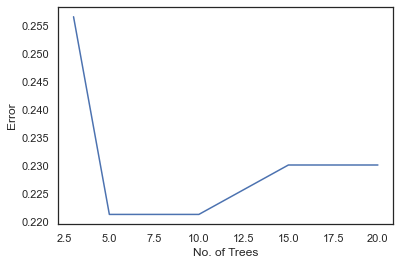

In [21]:
plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("No. of Trees")
plt.ylabel("Error")

## Stacking  - StackingClassifier

In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [30]:
estimators = [
    ('dt',  DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC()),
]

In [31]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [34]:
X_test_scaled = ss.transform(X_test)

In [35]:
clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [36]:
clf.score(X_test_scaled, y_test)

0.8297872340425532